# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,BatchNormalization
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,BatchNormalization

In [2]:
from keras.applications.resnet import preprocess_input


In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Map google Drive


In [5]:
#from google.colab import drive
#drive.mount('/content/drive/', force_remount=True)
#!cp -r 'drive/Othercomputers/KaiAIPC/KanisPC/nida/7202 deep learning/HW2/BuddhastatueData' '/content/data'
#data_dir = '/drive/Othercomputers/KaiAIPC/KanisPC/nida/7202 deep learning/HW2/BuddhastatueData' 
train_dir='data/train/'
validate_dir='data/validate/'
test_dir='data/test/'


In [6]:
import random
import numpy as np
import tensorflow as tf
seed=1111
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# 3. Load Data

In [7]:
img_w=224
img_h=224
num_classes = 8
my_batch_size=32


train_datagen_aug = ImageDataGenerator(
    #rescale=1./255,
    #rotation_range=40,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    #brightness_range=(0.5,0.8),
    #horizontal_flip=True,
    preprocessing_function=preprocess_input)

validate_datagen_aug = ImageDataGenerator(
    #rescale=1./255,
   preprocessing_function=preprocess_input)


train_generator_aug = train_datagen_aug.flow_from_directory(
    train_dir,
    target_size=(img_w, img_h),
    batch_size=my_batch_size,
    class_mode='categorical')

valid_generator_aug = validate_datagen_aug.flow_from_directory(
    validate_dir,
    target_size=(img_w, img_h),
    batch_size=my_batch_size,
    class_mode='categorical')





Found 1112 images belonging to 8 classes.
Found 368 images belonging to 8 classes.


# 6. Build Deep Learning Model

In [8]:

extractor = tf.keras.applications.ResNet50(weights = "imagenet", include_top=False, input_shape = (img_w, img_h, 3))

extractor.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [9]:

extractor.trainable = True
for i,layer in enumerate(extractor.layers):  
    layer.trainable=False



b = extractor.get_layer('conv5_block3_3_conv') 
b.trainable = True 
b = extractor.get_layer('conv5_block3_3_bn') 
b.trainable = True 

extractor.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [10]:
##Best Set
from tensorflow.keras import layers    
    
# Recursively freeze all layers in the model




data_augmentation = Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.Normalization(),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.1),
        layers.RandomContrast(factor=0.1),
        layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    ]
)

model = Sequential()   
model.add(data_augmentation) 
#model.add(dataaug)
model.add(extractor)


# Add our custom layer(s) to the end of the existing model 

#model.add(Conv2D( filters=32, kernel_size=(5,5), strides=(1,1), padding="same", activation='relu', name='our_conv1' ) )
#model.add(Dropout(0.1))
#model.add(Conv2D( filters=32, kernel_size=(3,3), strides=(1,1), padding="same", activation='relu', name='our_conv2' ) )
#model.add(Conv2D(32, (3,3), 1, activation='relu'))
#model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(512, activation="relu"))
#model.add(Dropout(0.5))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))


model.add(Dense(units=num_classes, activation="softmax"))
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.build((None,img_w,img_h,3))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       7         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 512)               51380736  
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)               

# 7. Train

In [11]:
logdir='logsResNet50'

In [12]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [13]:
import time
start_time = time.time()
hist = model.fit(train_generator_aug,epochs=50, validation_data=valid_generator_aug, callbacks=[tensorboard_callback])
end_time = time.time()
print('####################################')
print('#  Training time = %s seconds ---' % (end_time - start_time))

Epoch 1/50
15/35 [===========>..................] - ETA: 4s - loss: 17.1253 - accuracy: 0.1822

C:\Users\Kanis\anaconda3\envs\deeplearning\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


35/35 [==============================] - 19s 306ms/step - loss: 9.8349 - accuracy: 0.2041 - val_loss: 1.7717 - val_accuracy: 0.3315
Epoch 2/50
35/35 [==============================] - 6s 166ms/step - loss: 1.9538 - accuracy: 0.2752 - val_loss: 1.6831 - val_accuracy: 0.3696
Epoch 3/50
35/35 [==============================] - 6s 182ms/step - loss: 1.7909 - accuracy: 0.3174 - val_loss: 1.4595 - val_accuracy: 0.4076
Epoch 4/50
35/35 [==============================] - 6s 171ms/step - loss: 1.6820 - accuracy: 0.3453 - val_loss: 1.4353 - val_accuracy: 0.4674
Epoch 5/50
35/35 [==============================] - 6s 169ms/step - loss: 1.6267 - accuracy: 0.3786 - val_loss: 1.3820 - val_accuracy: 0.4755
Epoch 6/50
35/35 [==============================] - 6s 165ms/step - loss: 1.5117 - accuracy: 0.4119 - val_loss: 1.3427 - val_accuracy: 0.4321
Epoch 7/50
35/35 [==============================] - 6s 183ms/step - loss: 1.4773 - accuracy: 0.4317 - val_loss: 1.4786 - val_accuracy: 0.4158
Epoch 8/50
35/35

# 8. Plot Performance

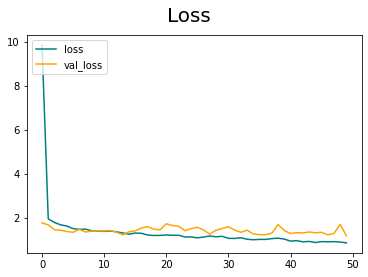

In [14]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

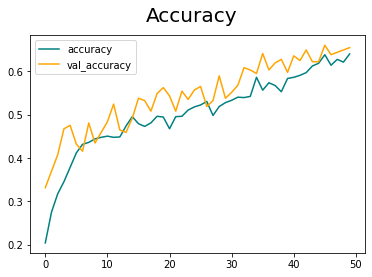

In [15]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluation


In [16]:

# evaluate model

test_datagen_aug = ImageDataGenerator(
   # rescale=1./255,
   preprocessing_function=preprocess_input)

test_it = test_datagen_aug.flow_from_directory(test_dir, target_size=(img_w, img_h),
    batch_size=my_batch_size,
    class_mode='categorical')


start_time = time.time()

score = model.evaluate(test_it)

end_time = time.time()

print("Loss: ", score[0], "Accuracy: ", score[1])
print('####################################')
print('#  Inference time = %s seconds ---' % (end_time - start_time))




Found 372 images belonging to 8 classes.
12/12 [==============================] - 3s 299ms/step - loss: 1.2379 - accuracy: 0.6102
Loss:  1.2379003763198853 Accuracy:  0.6102150678634644
####################################
#  Inference time = 3.6300032138824463 seconds ---


# 11. Save the Model

In [17]:
from tensorflow.keras.models import load_model

In [18]:
model.save(os.path.join('models','BuddhastatueDataimageclassifierresnet50.h5'))

In [19]:
new_model = load_model('models/BuddhastatueDataimageclassifierresnet50.h5')

ValueError: All `axis` values to be kept must have known shape. Got axis: (-1,), input shape: [None, None, None, None], with unknown axis at index: 3

In [ ]:
!nvidia-smi

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)